In [1]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [21]:
dff =pd.read_csv(r'C:\Users\Amardeep\Downloads\1.electric_vehicle_data.csv')

In [22]:
dff

,Vehicle_ID,Battery_Capacity_kWh,Motor_Power_kW,Weight_kg,Temperature_Celsius,Terrain_Type,Distance_Traveled_km,Average_Speed_kmph,Charging_Type,Energy_Consumption_kWh_per_100km
0,1,91.453287,144.713077,2306.402444,-9.817508,Highway,262.523326,16.858933,Fast,806.134311
1,2,55.596029,278.426210,2433.488911,32.894289,Suburban,66.140868,38.096844,Home,1214.442507
2,3,49.334685,141.111622,1207.229380,22.471884,Suburban,281.077227,38.017746,Home,240.234773
3,4,43.977956,252.662106,1595.065551,-4.788043,Highway,177.042720,55.472865,Home,315.630163
4,5,94.117021,100.060068,1279.696413,38.362606,Suburban,119.862466,33.800371,Home,1661.105114
...,...,...,...,...,...,...,...,...,...,...
995,996,83.403480,194.603532,2030.196131,1.780901,Urban,141.962617,98.436035,Home,1259.114483
996,997,68.448818,198.239941,1287.598985,16.688313,Suburban,183.645218,44.428797,Home,884.890093
997,998,69.803940,246.440589,1482.724663,29.096608,Urban,134.730399,39.790435,Fast,1217.302617
998,999,58.350458,60.074563,1588.490647,33.446197,Urban,207.295620,69.097834,Home,536.247522


In [23]:
one_hot=pd.get_dummies(dff['Terrain_Type'])
# Drop column as it is now encoded
dff = dff.drop('Terrain_Type',axis = 1)
# Join the encoded df
dff = dff.join(one_hot)

In [25]:
two_hot=pd.get_dummies(dff['Charging_Type'])
# Drop column as it is now encoded
dff = dff.drop('Charging_Type',axis = 1)
# Join the encoded df
dff = dff.join(two_hot)

In [26]:
dff

,Vehicle_ID,Battery_Capacity_kWh,Motor_Power_kW,Weight_kg,Temperature_Celsius,Distance_Traveled_km,Average_Speed_kmph,Energy_Consumption_kWh_per_100km,Highway,Suburban,Urban,Fast,Home,Public
0,1,91.453287,144.713077,2306.402444,-9.817508,262.523326,16.858933,806.134311,1,0,0,1,0,0
1,2,55.596029,278.426210,2433.488911,32.894289,66.140868,38.096844,1214.442507,0,1,0,0,1,0
2,3,49.334685,141.111622,1207.229380,22.471884,281.077227,38.017746,240.234773,0,1,0,0,1,0
3,4,43.977956,252.662106,1595.065551,-4.788043,177.042720,55.472865,315.630163,1,0,0,0,1,0
4,5,94.117021,100.060068,1279.696413,38.362606,119.862466,33.800371,1661.105114,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,83.403480,194.603532,2030.196131,1.780901,141.962617,98.436035,1259.114483,0,0,1,0,1,0
996,997,68.448818,198.239941,1287.598985,16.688313,183.645218,44.428797,884.890093,0,1,0,0,1,0
997,998,69.803940,246.440589,1482.724663,29.096608,134.730399,39.790435,1217.302617,0,0,1,1,0,0
998,999,58.350458,60.074563,1588.490647,33.446197,207.295620,69.097834,536.247522,0,0,1,0,1,0


In [27]:
E = dff

In [28]:
E.index = dff['Vehicle_ID']
E = E.drop(columns=['Vehicle_ID'])

In [29]:
#Scaling the bin and obtaining the scores for the pca analysis.
E_index=E.index
E= StandardScaler().fit_transform(E)
pca = PCA(n_components=3, svd_solver='full')
PC_scores = pca.fit_transform(E)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index =E_index)

In [32]:
A2

,Battery_Capacity_kWh,Motor_Power_kW,Weight_kg,Temperature_Celsius,Distance_Traveled_km,Average_Speed_kmph,Highway,Suburban,Urban,Fast,Home,Public
Vehicle_ID,,,,,,,,,,,,
1,91.453287,144.713077,2306.402444,-9.817508,262.523326,16.858933,1,0,0,1,0,0
2,55.596029,278.426210,2433.488911,32.894289,66.140868,38.096844,0,1,0,0,1,0
3,49.334685,141.111622,1207.229380,22.471884,281.077227,38.017746,0,1,0,0,1,0
4,43.977956,252.662106,1595.065551,-4.788043,177.042720,55.472865,1,0,0,0,1,0
5,94.117021,100.060068,1279.696413,38.362606,119.862466,33.800371,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,83.403480,194.603532,2030.196131,1.780901,141.962617,98.436035,0,0,1,0,1,0
997,68.448818,198.239941,1287.598985,16.688313,183.645218,44.428797,0,1,0,0,1,0
998,69.803940,246.440589,1482.724663,29.096608,134.730399,39.790435,0,0,1,1,0,0


In [33]:
#Dropping unnecessary columns from the dataset.
A2=dff.drop(columns=['Vehicle_ID'])
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = A2.columns)

In [34]:
#PLotting the PCA plot fucntion
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

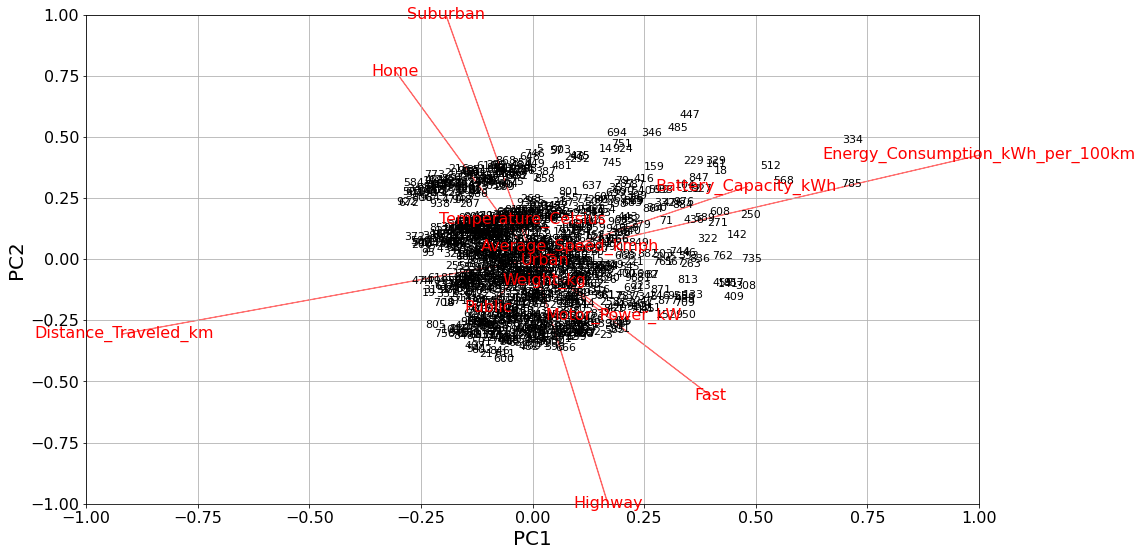

In [35]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

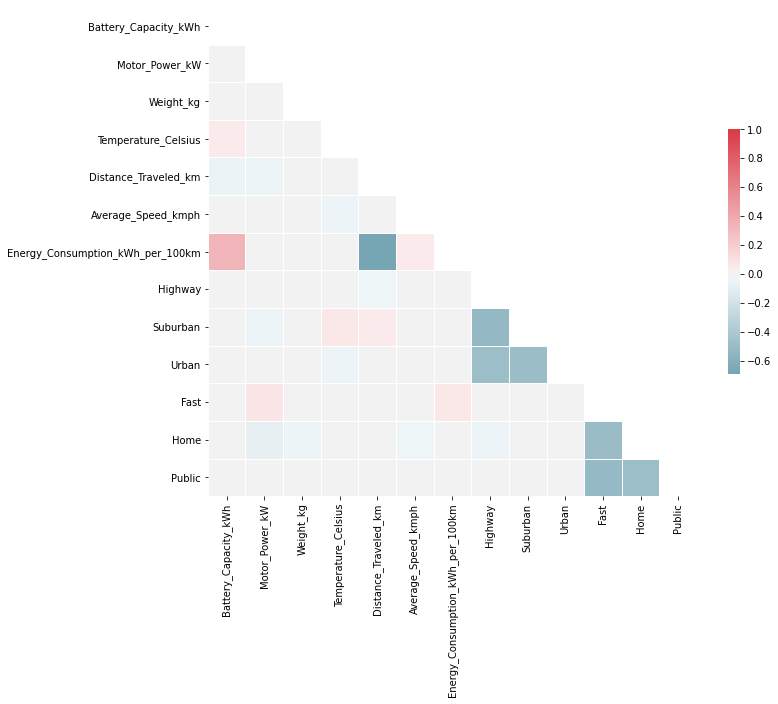

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [36]:
#Creating a correlation plot for the variables
import seaborn as sns
corr = A2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.figure(figsize=(50,50))

array([[<AxesSubplot:title={'center':'Battery_Capacity_kWh'}>]],
      dtype=object)

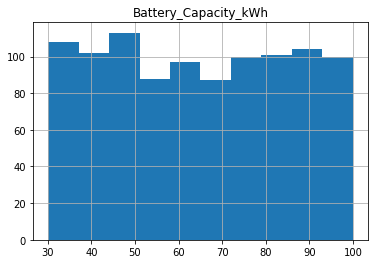

In [106]:
A2.hist(column='Battery_Capacity_kWh')

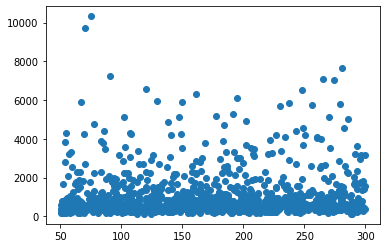

In [107]:
#Scatter plots between pm2.5 and pressure.
plt.scatter(x=A2['Motor_Power_kW'],y=A2['Energy_Consumption_kWh_per_100km'])

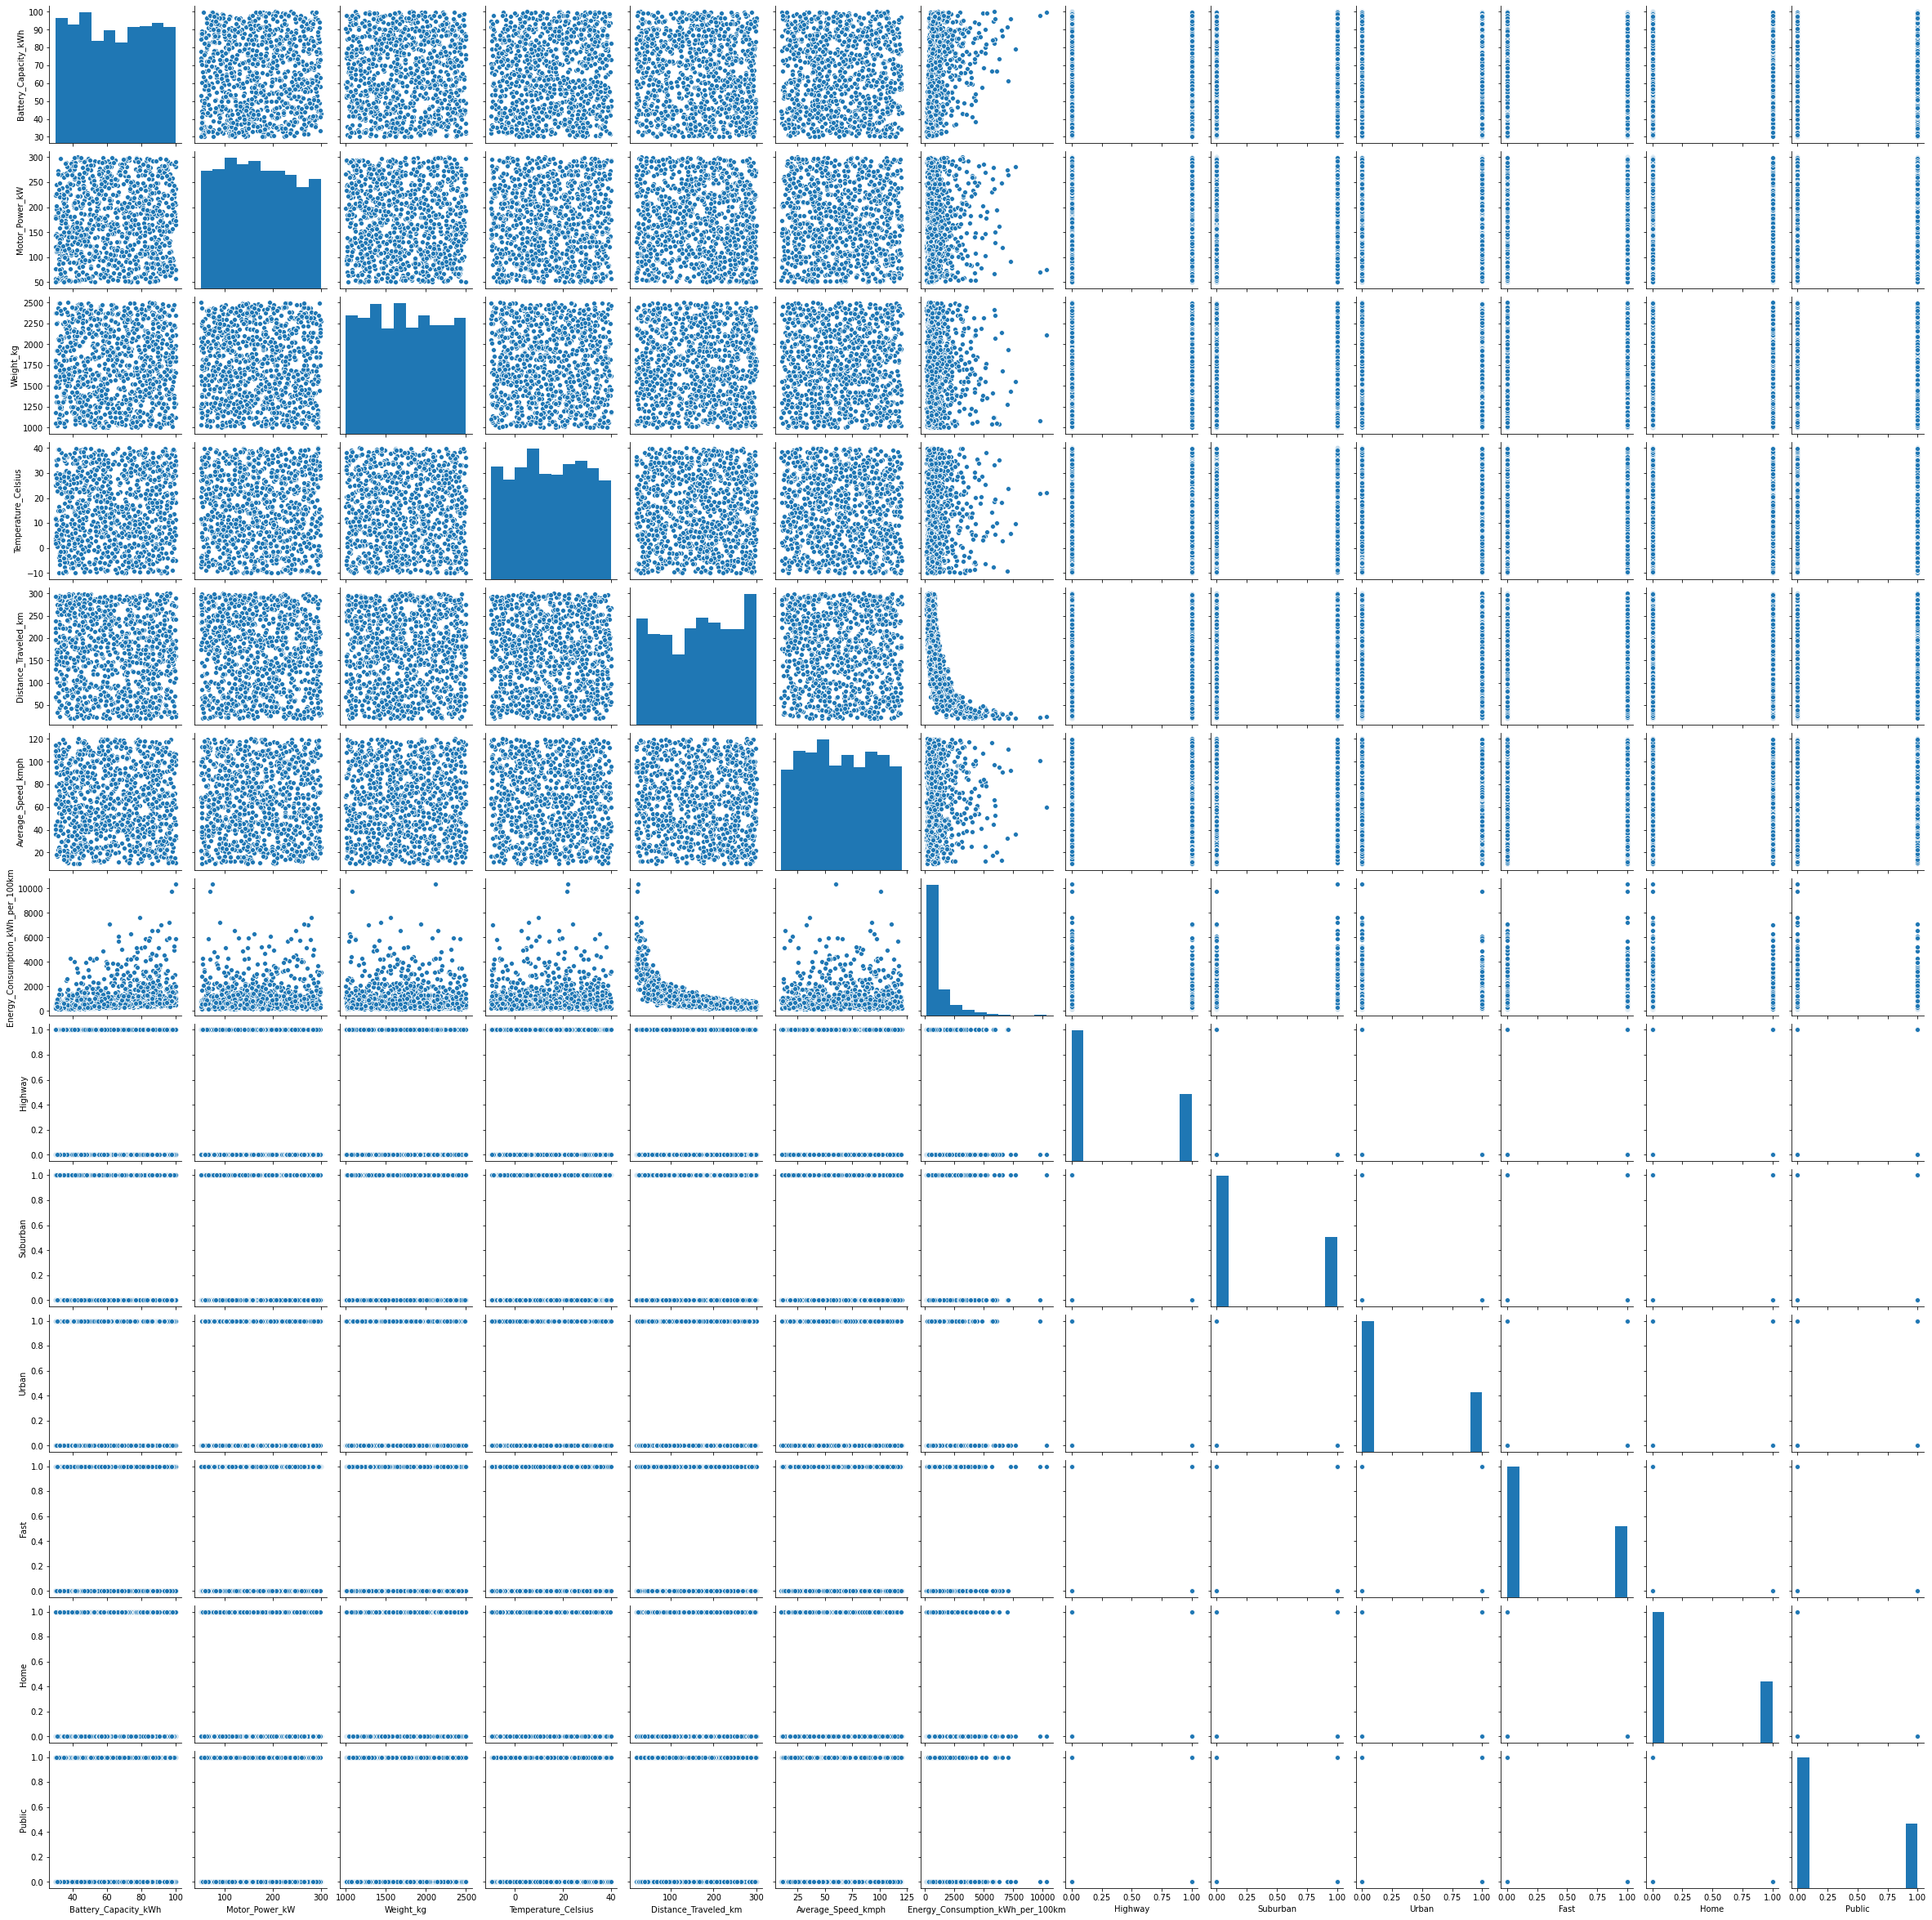

In [37]:
sns.pairplot(A2)
plt.show()

In [38]:
#Performing PCA for 10 components
pca10 = PCA(n_components=10, svd_solver='full')
pca10.fit(E)

PCA(n_components=10, svd_solver='full')

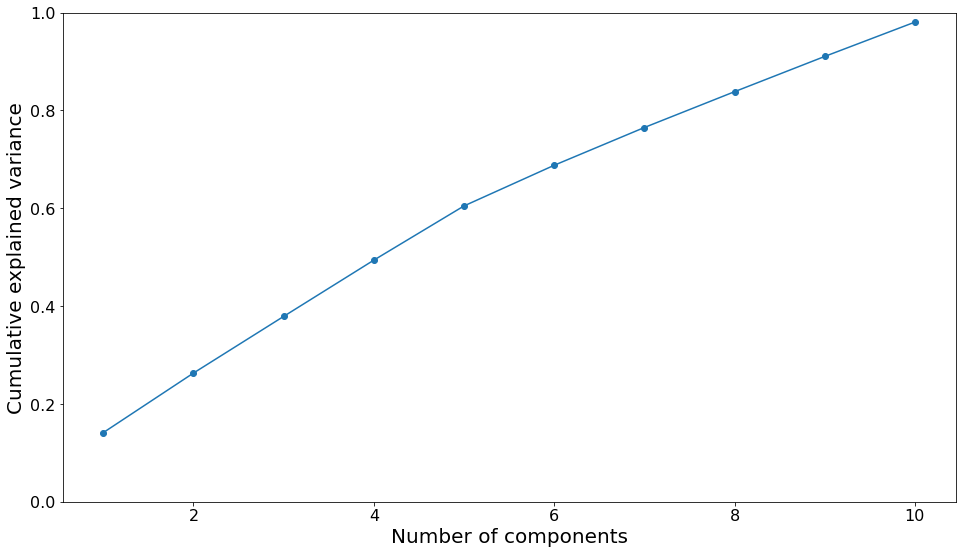

In [39]:
#Variance for components displayed in graph.
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)

plt.show()

In [41]:
A2

,Battery_Capacity_kWh,Motor_Power_kW,Weight_kg,Temperature_Celsius,Distance_Traveled_km,Average_Speed_kmph,Energy_Consumption_kWh_per_100km,Highway,Suburban,Urban,Fast,Home,Public
Vehicle_ID,,,,,,,,,,,,,
1,91.453287,144.713077,2306.402444,-9.817508,262.523326,16.858933,806.134311,1,0,0,1,0,0
2,55.596029,278.426210,2433.488911,32.894289,66.140868,38.096844,1214.442507,0,1,0,0,1,0
3,49.334685,141.111622,1207.229380,22.471884,281.077227,38.017746,240.234773,0,1,0,0,1,0
4,43.977956,252.662106,1595.065551,-4.788043,177.042720,55.472865,315.630163,1,0,0,0,1,0
5,94.117021,100.060068,1279.696413,38.362606,119.862466,33.800371,1661.105114,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,83.403480,194.603532,2030.196131,1.780901,141.962617,98.436035,1259.114483,0,0,1,0,1,0
997,68.448818,198.239941,1287.598985,16.688313,183.645218,44.428797,884.890093,0,1,0,0,1,0
998,69.803940,246.440589,1482.724663,29.096608,134.730399,39.790435,1217.302617,0,0,1,1,0,0


In [42]:
#Splitting the input and output into separate dataframes
y=A2['Energy_Consumption_kWh_per_100km']
X=A2.drop(columns=['Energy_Consumption_kWh_per_100km'])

In [47]:
#Standard test using normal condiitons
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
#Create a Gaussian Classifier
rf1=RandomForestRegressor(n_estimators = 100, max_depth=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf1.fit(X_train,y_train)

# prediction on test set
y_pred=rf1.predict(X_test)

In [50]:
from sklearn.linear_model import LarsCV
from sklearn.datasets import make_regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=40)
reg = LarsCV(cv=10).fit(X_train, y_train)
reg.score(X_train, y_train)

0.589415510989831

In [51]:
reg.score(X_test,y_test)

0.5382427724098321

In [55]:
 def get_params(self, deep=True):
        """Get parameters for this estimator.
        Parameters
        ----------
        deep : boolean, optional
            If True, will return the parameters for this estimator and
            contained subobjects that are estimators.
        Returns
        -------
        params : mapping of string to any
            Parameter names mapped to their values.
        """
        out = dict()
        for key in self._get_param_names():
            value = getattr(self, key, None)
            if deep and hasattr(value, 'get_params'):
                deep_items = value.get_params().items()
                out.update((key + '__' + k, val) for k, val in deep_items)
            out[key] = value
        return out

def set_params(self, **params):
        """Set the parameters of this estimator.
        The method works on simple estimators as well as on nested objects
        (such as pipelines). The latter have parameters of the form
        ``<component>__<parameter>`` so that it's possible to update each
        component of a nested object.
        Returns
        -------
        self
        """
        if not params:
            # Simple optimization to gain speed (inspect is slow)
            return self
        valid_params = self.get_params(deep=True)

        nested_params = defaultdict(dict)  # grouped by prefix
        for key, value in params.items():
            key, delim, sub_key = key.partition('__')
            if key not in valid_params:
                raise ValueError('Invalid parameter %s for estimator %s. '
                                 'Check the list of available parameters '
                                 'with `estimator.get_params().keys()`.' %
                                 (key, self))

            if delim:
                nested_params[key][sub_key] = value
            else:
                setattr(self, key, value)
                valid_params[key] = value

        for key, sub_params in nested_params.items():
            valid_params[key].set_params(**sub_params)

        return self

In [57]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=40)
reg5 = linear_model.Ridge(alpha=.5)
reg5.fit(X,y)
reg5.coef_

array([ 17.35019792,  -0.18979142,  -0.08137701,  -1.49856252,
        -9.83798441,   1.03330851, -37.56926936,  32.08284499,
         5.48642436,  54.96204272, -17.01617768, -37.94586504])

In [58]:
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=40)
regbr1 = linear_model.BayesianRidge()
regbr1.fit(X_train, y_train)  
regbr1.score(X_train,y_train)

0.5871416296606013

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=40)
regbr2 = linear_model.BayesianRidge()
regbr1.fit(X_test, y_test)
regbr1.score(X_test,y_test)

0.5658037238185146

In [60]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
X, y = make_regression(n_features=10, random_state=0)
regr15 = ElasticNetCV(cv=5, random_state=0)
regr15.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=0)

In [61]:
regr15.fit(X_test, y_test)  
regr15.score(X_test,y_test)

0.5636727815316841

In [62]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
rego = OrthogonalMatchingPursuit().fit(X_train, y_train)
rego.score(X_train, y_train)

0.4738243100664945

In [63]:
rego.fit(X_test, y_test)
rego.score(X_test,y_test)

0.4768603067156493

In [65]:
#Code for demographic dataset II(Predicting Mean Debt)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [67]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 15)

In [68]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[09:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 116.070966


In [70]:
# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -85.363 (16.293)


In [71]:
stat_scaled = StandardScaler().fit_transform(E)

In [72]:
stat_scaled

array([[ 1.30295661, -0.37527277,  1.31224387, ...,  1.35978044,
        -0.6828438 , -0.70339769],
       [-0.44735753,  1.49614042,  1.60638955, ..., -0.73541284,
         1.46446375, -0.70339769],
       [-0.75299492, -0.42567777, -1.23182725, ..., -0.73541284,
         1.46446375, -0.70339769],
       ...,
       [ 0.24617872,  1.04847823, -0.59418463, ...,  1.35978044,
        -0.6828438 , -0.70339769],
       [-0.3129045 , -1.55985074, -0.34938589, ..., -0.73541284,
         1.46446375, -0.70339769],
       [ 1.46111874, -1.26301504,  0.61963506, ..., -0.73541284,
         1.46446375, -0.70339769]])

In [76]:
sc=pd.DataFrame(data=stat_scaled,columns=A2.columns)

In [77]:
# evaluate adaboost ensemble for regression
y = sc['Energy_Consumption_kWh_per_100km']
X = sc.drop(columns=['Energy_Consumption_kWh_per_100km'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.282 (0.038)


In [79]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv=10,n_jobs=1))
    print(depth, score)

1 -0.4665006452342194
2 -0.3298919813850067
3 -0.24338425905946942
4 -0.1844261002642531
5 -0.18390516798846918
6 -0.21473861072072667
7 -0.22093608635146839
8 -0.22545316537757892
9 -0.2480393922465834


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23470168723867146
Mean Squared Error: 0.19159806299984872
Root Mean Squared Error: 0.4377191599642957


In [89]:
from sklearn.linear_model import LarsCV
from sklearn.datasets import make_regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=40)
reg = LarsCV(cv=10).fit(X_train, y_train)
reg.score(X_train, y_train)

0.5894155109898311

In [90]:
#Code for demographic dataset II(Predicting Mean Debt)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [91]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 15)

In [92]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[09:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.522921


In [98]:
from math import sqrt
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  0.3923297581109713
RMSE:  0.6263623217523315
R2 : 0.6306796061222809


In [97]:
from sklearn.tree import DecisionTreeRegressor
# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  0.29684749698050544
RMSE:  0.5448371288564183
R2 : 0.7205620215139386


In [99]:
# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  0.1714123990163851
RMSE:  0.41401980510162206
R2 : 0.8386405991096147


In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
rmse_val = []                             #To store rmse values for different k
for K in range(50):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)       #fit the model
    y_pred = model.predict(X_test)    #prediction on Test set
    error = sqrt(mean_squared_error(y_test, y_pred))      #calculate rmse
    rmse_val.append(error)            #store rmse values
    print('RMSE value for K= ', K, ':is', error)

RMSE value for K=  1 :is 1.1200245101685928
RMSE value for K=  2 :is 0.9834698043100614
RMSE value for K=  3 :is 0.8690500411222918
RMSE value for K=  4 :is 0.8257511222522611
RMSE value for K=  5 :is 0.7773336566937904
RMSE value for K=  6 :is 0.7515511968123927
RMSE value for K=  7 :is 0.746304822381118
RMSE value for K=  8 :is 0.743420775790797
RMSE value for K=  9 :is 0.7485157220181602
RMSE value for K=  10 :is 0.7490477843371958
RMSE value for K=  11 :is 0.7578551544831839
RMSE value for K=  12 :is 0.7587120793465382
RMSE value for K=  13 :is 0.7687810594427169
RMSE value for K=  14 :is 0.7769897660229889
RMSE value for K=  15 :is 0.7840925893922719
RMSE value for K=  16 :is 0.7754834756596681
RMSE value for K=  17 :is 0.7848044400742131
RMSE value for K=  18 :is 0.7953809658266138
RMSE value for K=  19 :is 0.799694231540227
RMSE value for K=  20 :is 0.8012282411541236
RMSE value for K=  21 :is 0.8013957903530937
RMSE value for K=  22 :is 0.7954968968610465
RMSE value for K=  23 

<AxesSubplot:>

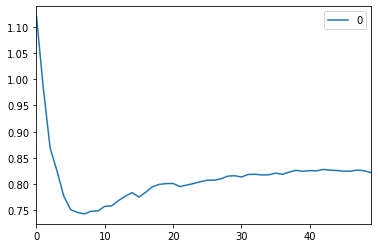

In [103]:
# Plot the Graph for K Values

curve = pd.DataFrame(rmse_val)  # Elbow Curve
curve.plot()

In [104]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12]}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, params, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'n_neighbors': 8}

In [105]:
A2.columns

Index(['Battery_Capacity_kWh', 'Motor_Power_kW', 'Weight_kg',
       'Temperature_Celsius', 'Distance_Traveled_km', 'Average_Speed_kmph',
       'Energy_Consumption_kWh_per_100km', 'Highway', 'Suburban', 'Urban',
       'Fast', 'Home', 'Public'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Battery_Capacity_kWh'}>]],
      dtype=object)

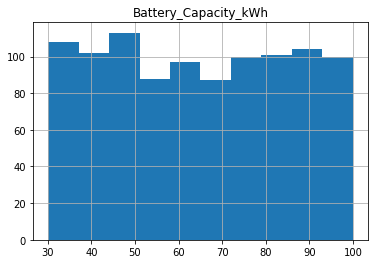

In [106]:
A2.hist(column='Battery_Capacity_kWh')

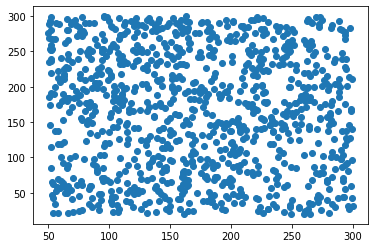

In [108]:
#Scatter plots between pm2.5 and pressure.
plt.scatter(x=A2['Motor_Power_kW'],y=A2['Distance_Traveled_km'])